In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from yellowbrick.contrib.classifier import DecisionViz

from warnings import filterwarnings
filterwarnings('ignore')

plt.style.use('ggplot')

# Separação e Margens

## Dados

In [60]:
x, y = make_classification(n_samples=2000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_classes=2,
                           random_state=32)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                   test_size=0.2, stratify=y,
                                   random_state=32)

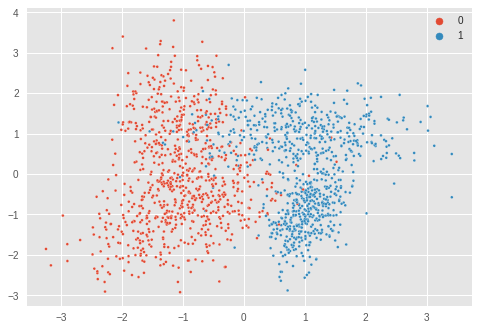

In [63]:
f, ax = plt.subplots()

sns.scatterplot(x=x_train[:, 0], 
                y=x_train[:, 1], 
                hue=y_train, 
                s=8);

In [65]:
svc_model = SVC(kernel='linear', random_state=32)
svc_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=32)

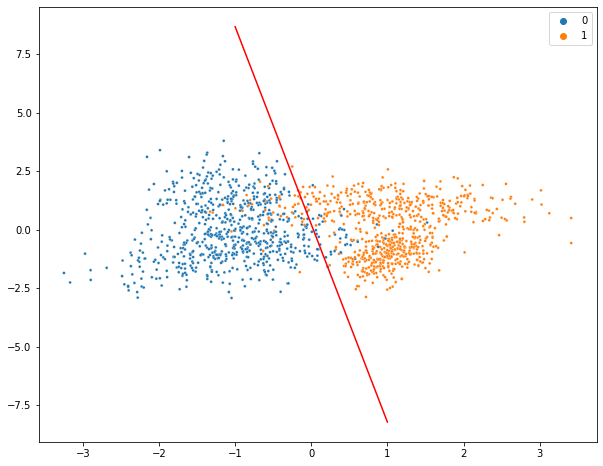

In [34]:
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=y_train, 
                s=8);
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

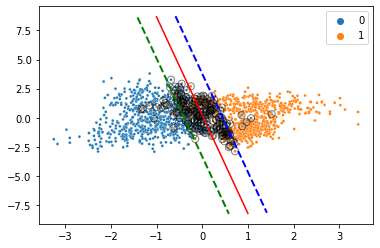

In [35]:
sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=y_train, 
                s=8);
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');
# Encircle support vectors
plt.scatter(svc_model.support_vectors_[:, 0],
            svc_model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='k', 
            alpha=.5);
# Step 2 (unit-vector):
w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
# Plot margin lines
# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)

In [39]:
df = pd.read_csv('../data/data_svm.csv').rename(columns={'y':'x2'}).replace('a',0).replace('b',1)
df.head()

,x,x2,z
0,349.326688,477.006541,0
1,327.580984,458.953818,0
2,331.637500,440.224571,0
3,310.917899,444.582325,0
4,306.857728,449.770460,0


In [42]:
x = df.drop('z',axis=1)
y = df.z

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

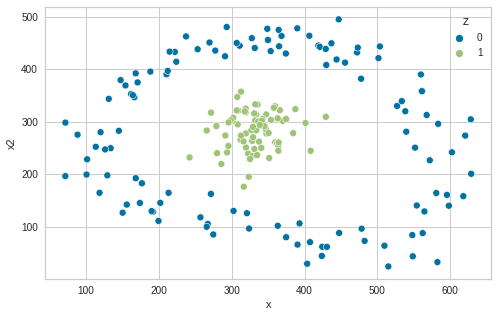

In [44]:
f, ax = plt.subplots(figsize=(8,5))
sns.scatterplot('x','x2',hue='z',data=df);

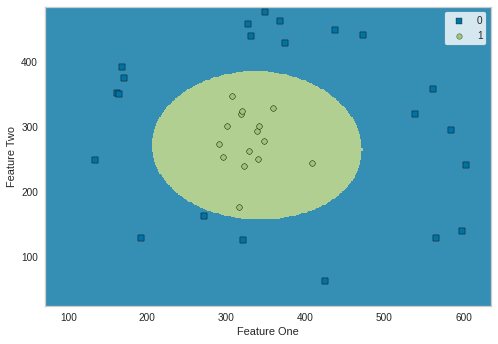

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [51]:
viz = DecisionViz(SVC(random_state=42))
viz.fit(x_train.values, y_train.values)
viz.draw(x_test.values, y_test.values)
viz.show()